In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [28]:
# Load the data
data = pd.read_csv('bank_note_data.csv')

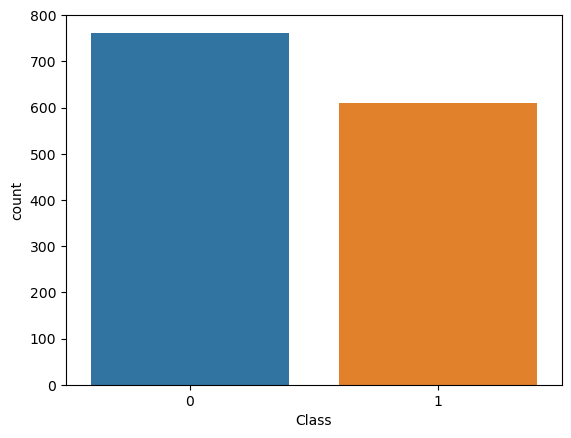

In [29]:
# Data visualization
sns.countplot(x='Class', data=data)
plt.show()

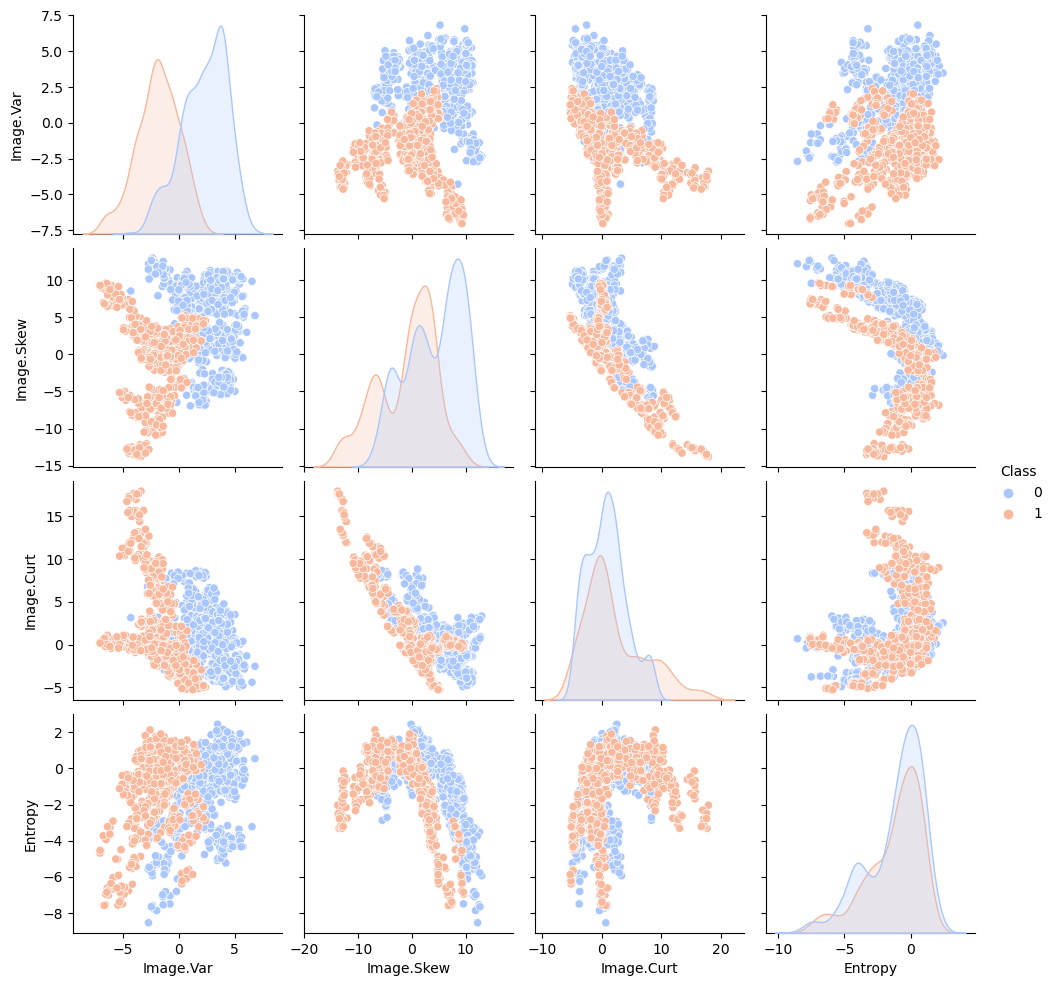

In [30]:
sns.pairplot(data, hue='Class',palette='coolwarm')
plt.show()

In [31]:
# Data preprocessing
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('Class', axis=1))
df_feat = pd.DataFrame(scaled_features, columns=data.columns[:-1])

In [32]:
X = df_feat
y = data['Class']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [34]:
# Create a Sequential model
model = Sequential()

In [35]:
# Add input layer and hidden layers
model.add(Dense(units=10, activation='relu', input_dim=len(X_train.columns)))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=10, activation='relu'))

In [36]:
# Add output layer
model.add(Dense(units=1, activation='sigmoid'))

In [37]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=20, verbose=1)

Epoch 1/50
46/46 [==============================] - 3s 6ms/step - loss: 0.6971 - accuracy: 0.4374
Epoch 2/50
46/46 [==============================] - 0s 4ms/step - loss: 0.6177 - accuracy: 0.8063
Epoch 3/50
46/46 [==============================] - 0s 4ms/step - loss: 0.4881 - accuracy: 0.8390
Epoch 4/50
46/46 [==============================] - 0s 4ms/step - loss: 0.3362 - accuracy: 0.8847
Epoch 5/50
46/46 [==============================] - 0s 4ms/step - loss: 0.2174 - accuracy: 0.9380
Epoch 6/50
46/46 [==============================] - 0s 5ms/step - loss: 0.1303 - accuracy: 0.9695
Epoch 7/50
46/46 [==============================] - 0s 5ms/step - loss: 0.0763 - accuracy: 0.9782
Epoch 8/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0511 - accuracy: 0.9859
Epoch 9/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0361 - accuracy: 0.9924
Epoch 10/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0261 - accuracy: 0.9967
Epoch 11/50
46/46 [

In [39]:
# Evaluate the model
predictions = model.predict(X_test)

15/15 [==============================] - 0s 4ms/step


In [40]:
y_pred = [1 if p > 0.5 else 0 for p in predictions]

In [41]:
print(confusion_matrix(y_test, y_pred))

[[262   0]
 [  0 191]]


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       262
           1       1.00      1.00      1.00       191

    accuracy                           1.00       453
   macro avg       1.00      1.00      1.00       453
weighted avg       1.00      1.00      1.00       453



In [43]:
# Random Forest Classifier for comparison
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_preds = rfc.predict(X_test)

In [44]:
print(confusion_matrix(y_test, rfc_preds))

[[258   4]
 [  0 191]]


In [45]:
print(classification_report(y_test, rfc_preds))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       262
           1       0.98      1.00      0.99       191

    accuracy                           0.99       453
   macro avg       0.99      0.99      0.99       453
weighted avg       0.99      0.99      0.99       453

